In [13]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Load data 

In [44]:
# Load the datasets
red_wine_data = pd.read_csv("winequality-red.csv", sep=';')
white_wine_data = pd.read_csv("winequality-white.csv", sep=';')


### EDA

In [45]:
# Assign labels to the observations
red_wine_data['wine_type'] = 'red'
white_wine_data['wine_type'] = 'white'

# Concatenate the two datasets
data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

# Display the combined dataset
data.head()
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


Identify Missing values 

In [16]:
features_with_na = [feature for feature in data.columns if data[feature].isnull().sum() > 1]

for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean() * 100, 2), '% Missing Values')

Numerical value understanding 

In [17]:
numerical_features = [features for features in data.columns if data[features].dtypes !='O']
print (f"Number of Numaric features: {len(numerical_features)}")
data[numerical_features].head()

Number of Numaric features: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


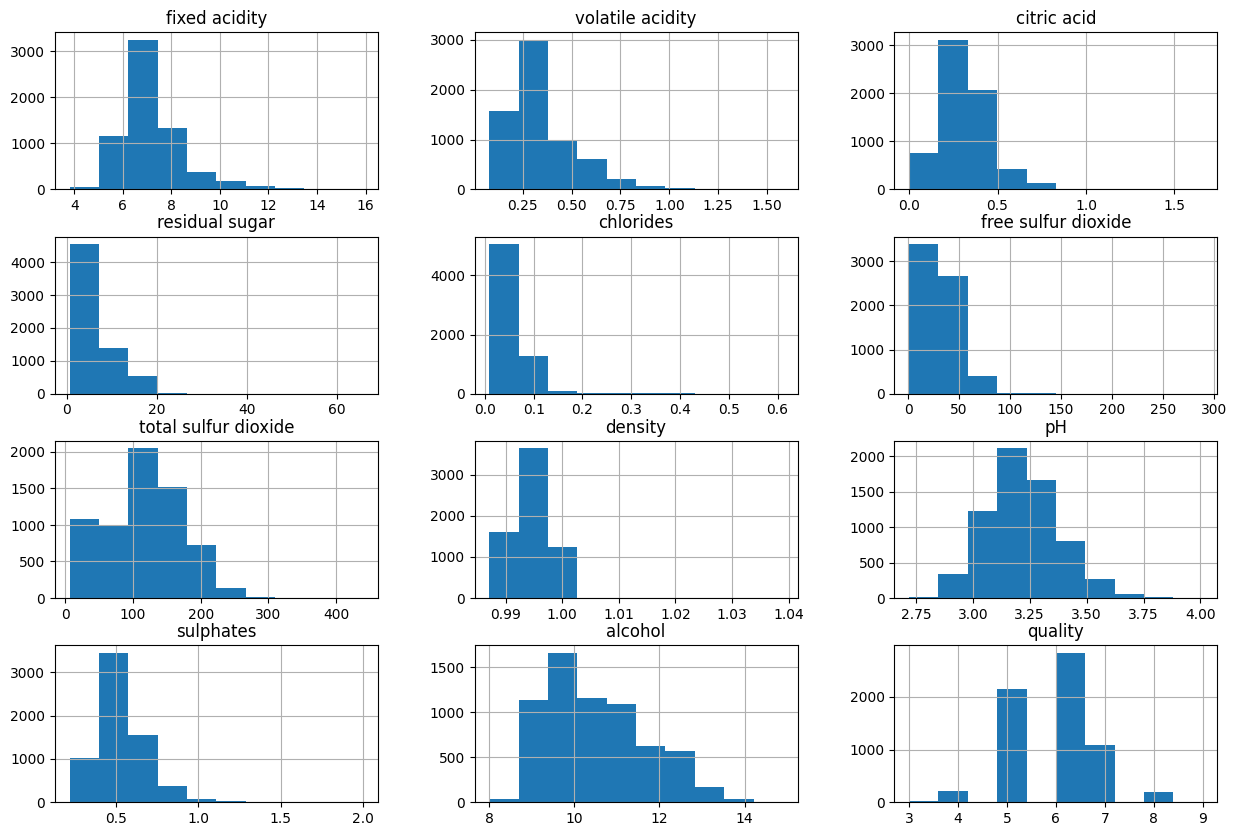

In [18]:
data[numerical_features].hist(figsize=(15, 10))
plt.show()

Identify discrete variables

In [19]:
threshold = 25  
discrete_features = [feature for feature in numerical_features if len(data[feature].unique()) <= threshold]
print(discrete_features)


['quality']


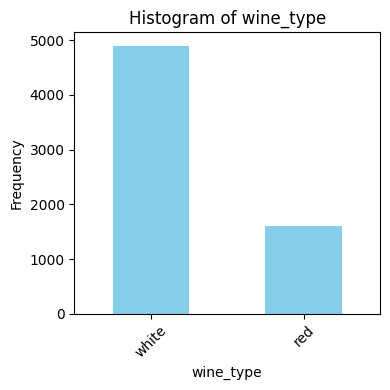

In [20]:
categorical_columns = data.select_dtypes(include=object)
for col in categorical_columns :
    unique_cat=data[col].nunique()
    if unique_cat <5: 
        plt.figure(figsize=(4,4))
        data[col].value_counts().plot(kind="bar",color='skyblue')
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

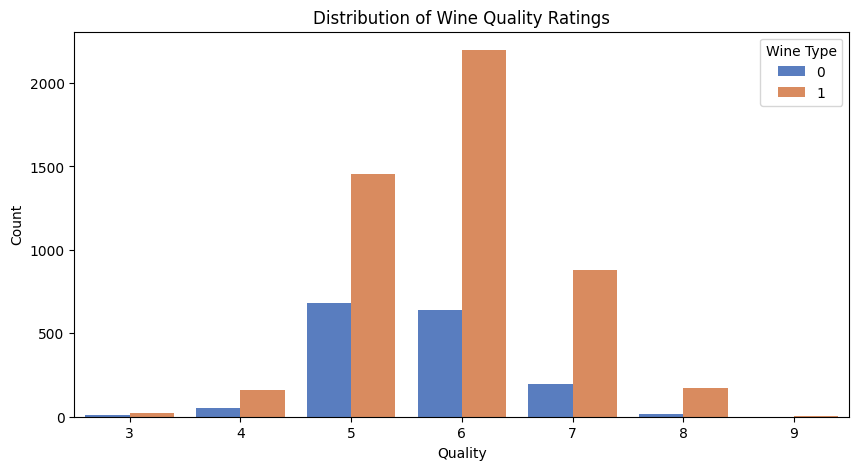

wine_type    0     1
quality             
3           10    20
4           53   163
5          681  1457
6          638  2198
7          199   880
8           18   175
9            0     5


In [97]:
# Distribution of quality ratings
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', hue='wine_type', data=data, palette='muted')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.legend(title='Wine Type')
plt.show()
summary_table = data.pivot_table(index='quality', columns='wine_type', aggfunc='size', fill_value=0)
summary_table_alt = data.groupby(['quality', 'wine_type']).size().unstack(fill_value=0)
print(summary_table)

Lable Encording 

In [22]:
data['wine_type'] = data['wine_type'].replace({'red': 0, 'white': 1})


C:\Users\Kanchana\AppData\Local\Temp\ipykernel_18496\1650888631.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['wine_type'] = data['wine_type'].replace({'red': 0, 'white': 1})


In [72]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


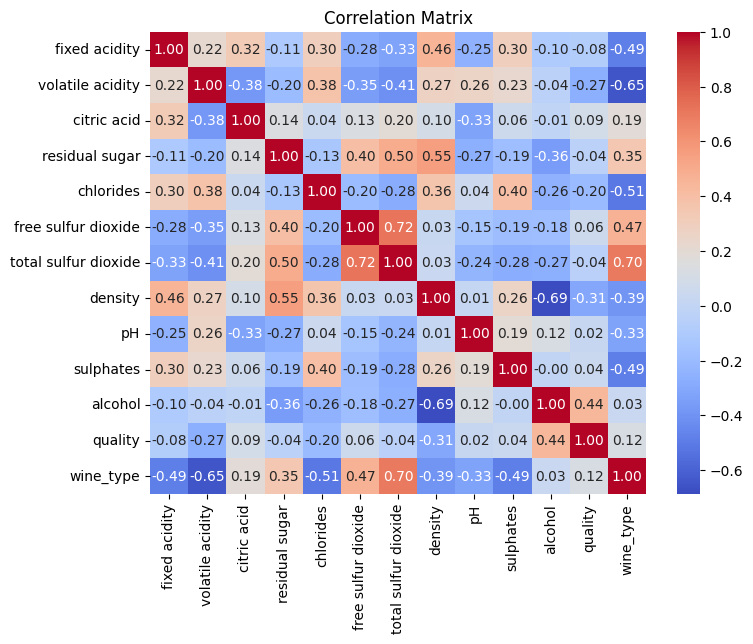

In [23]:

correlation_matrix = data.corr()
# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Data Modeling 

### Training and test data preperation 

In [24]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the dataset
dt_data = shuffle(data, random_state=123)


In [25]:
# Features and Target
data['wine_type'] = data['wine_type'].replace({'red': 0, 'white': 1})
X = dt_data.drop(columns=['quality'])
y = dt_data['quality']
# Split the data into training and testing sets (Unseen Data in the Cross validation)
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.1, random_state=456)

print("X_train samples:", len(X_train))
print("X_unseen samples:", len(X_unseen))
print("y_train samples:", len(y_train))
print("y_unseen samples:", len(y_unseen))

X_train samples: 5847
X_unseen samples: 650
y_train samples: 5847
y_unseen samples: 650


### Decision Tree Regression Model 

withot K -Fold Cross Validation

X_train samples: 5847
X_unseen samples: 650
y_train samples: 5847
y_unseen samples: 650
RMSE: 0.7795462190866604
Mean RMSE: 0.7795462190866604
Standard Deviation of RMSE: 0.0
R-Squired: 0.14550253104313593


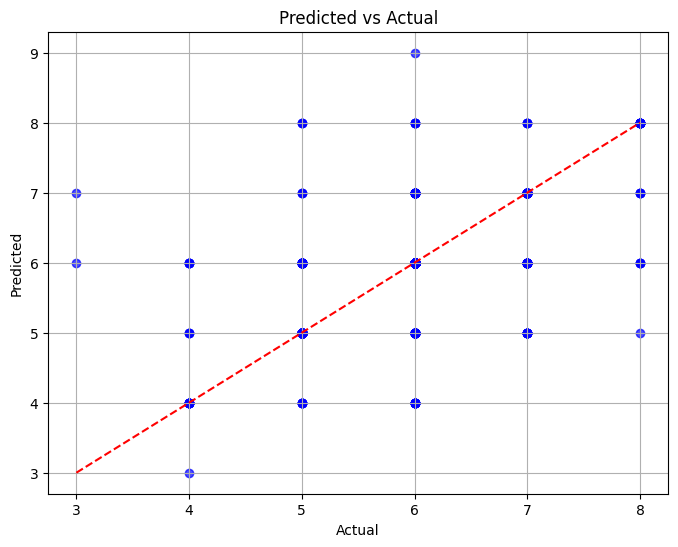

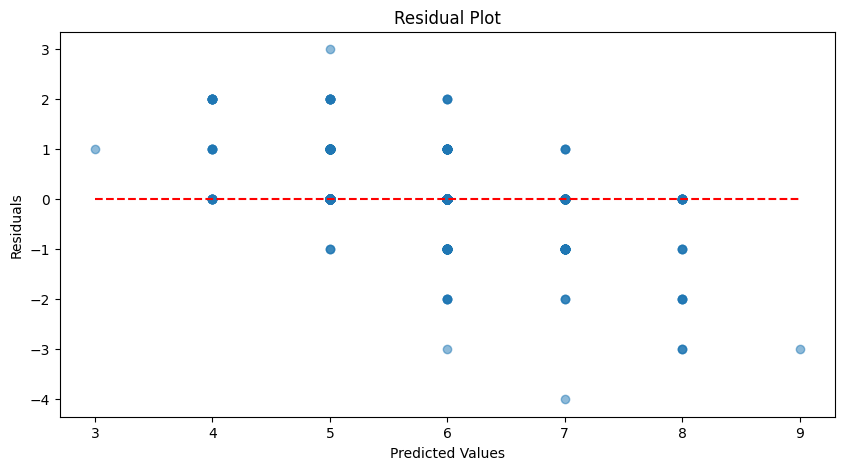

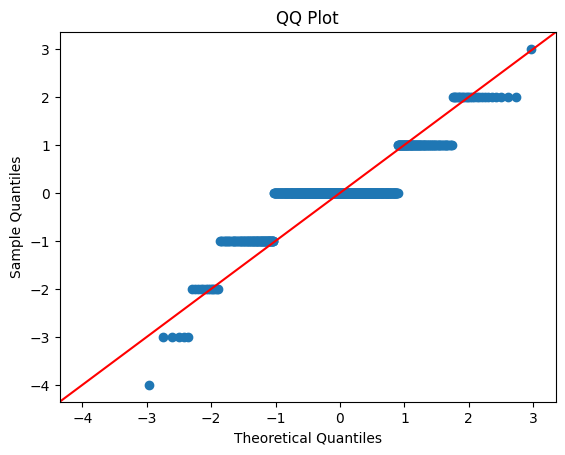

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm

# Features and Target
data['wine_type'] = data['wine_type'].replace({'red': 0, 'white': 1})
X = dt_data.drop(columns=['quality'])
y = dt_data['quality']
# Split the data into training and testing sets (Unseen Data in the Cross validation)
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.1, random_state=456)

print("X_train samples:", len(X_train))
print("X_unseen samples:", len(X_unseen))
print("y_train samples:", len(y_train))
print("y_unseen samples:", len(y_unseen))


# Tree Regression using Decision Trees
dt_sim_model = DecisionTreeRegressor(random_state=456)

# Fit the model on the training data
dt_sim_model.fit(X_train, y_train)


# Predict on the test data
y_pred = dt_sim_model.predict(X_unseen)

# Calculate RMSE and R^2 score
rmse_scores = np.sqrt(mean_squared_error(y_unseen, y_pred))
r2 = r2_score(y_unseen, y_pred)

print(f'RMSE: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')
print(f'R-Squired: {r2}')

# Plotting Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_unseen, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_unseen), max(y_unseen)], [min(y_unseen), max(y_unseen)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.grid(True)
plt.show()

residuals = y_unseen - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# QQ Plot
sm.qqplot(residuals, line='45')
plt.title('QQ Plot')
plt.show()


With K-Fold cross validation 

X_train samples: 5847
X_unseen samples: 650
y_train samples: 5847
y_unseen samples: 650
Cross-validated RMSE scores: [0.75899168 0.88867519 0.82171386 0.78446454 0.86725818 0.81858748
 0.82171386 0.87683272 0.82449653 0.81614698]
Mean RMSE: 0.8278881029474279
Standard Deviation of RMSE: 0.038190406157182596
Test Mean Squared Error: 0.6076923076923076
Test Root Mean Squared Error: 0.7795462190866604
Test R-squared: 0.14550253104313593


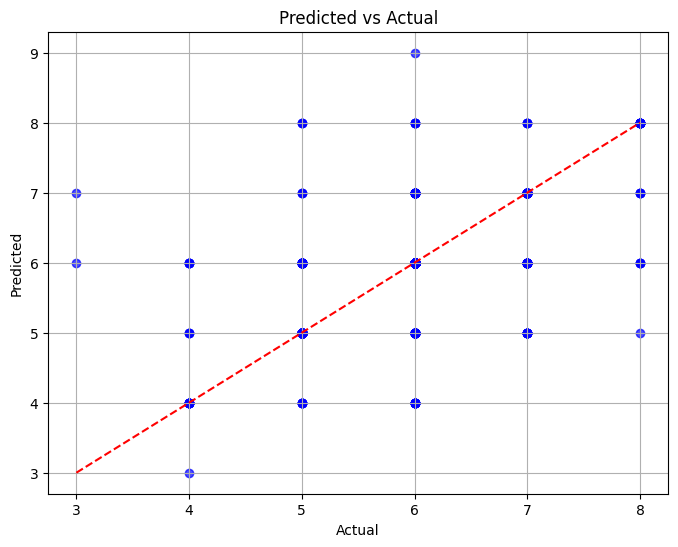

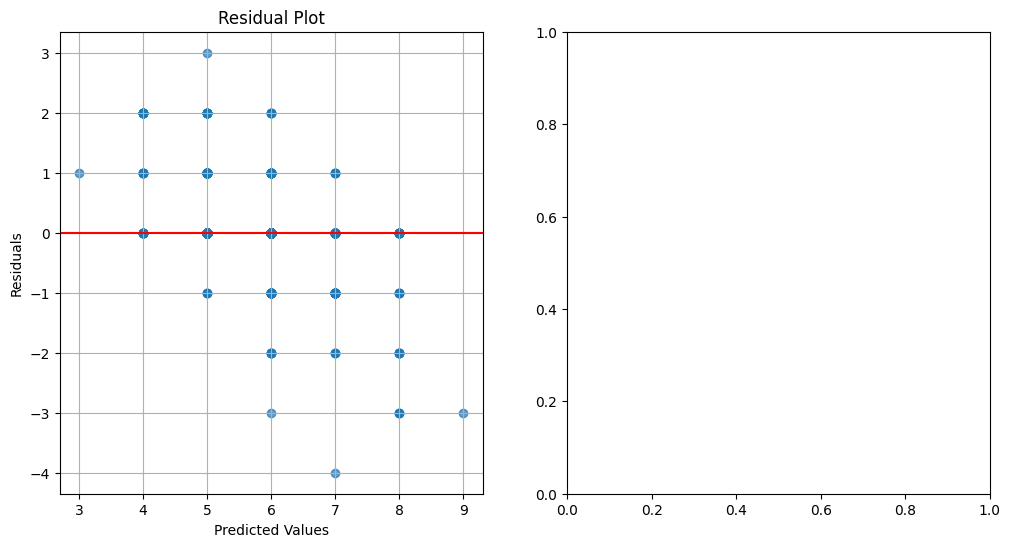

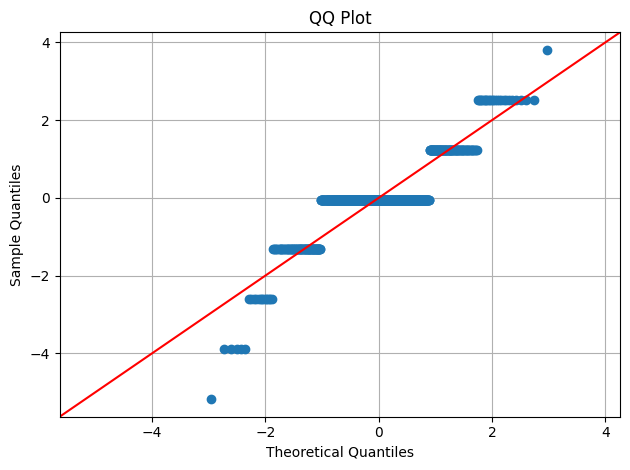

In [109]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
# Tree Regression  Decision Trees

# Features and Target
data['wine_type'] = data['wine_type'].replace({'red': 0, 'white': 1})
X = dt_data.drop(columns=['quality'])
y = dt_data['quality']
# Split the data into training and testing sets (Unseen Data in the Cross validation)
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.1, random_state=456)

print("X_train samples:", len(X_train))
print("X_unseen samples:", len(X_unseen))
print("y_train samples:", len(y_train))
print("y_unseen samples:", len(y_unseen))

dt_kf_model = DecisionTreeRegressor(random_state=456)

# Perform 10-fold cross-validation and get predictions
kf = KFold(n_splits=10, shuffle=True, random_state=456)
cv_scores = cross_val_score(dt_kf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores
rmse_scores = np.sqrt(cv_scores)

print(f'Cross-validated RMSE scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')

# Train the final model on the entire training set
dt_kf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_kf_model.predict(X_unseen)

# Calculate the regression metrics on the test set
mse = mean_squared_error(y_unseen, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_unseen, y_pred)

print(f'Test Mean Squared Error: {mse}')
print(f'Test Root Mean Squared Error: {rmse}')
print(f'Test R-squared: {r2}')

# Visualize the predictions vs actual values
residuals = y_unseen - y_pred

# Plotting Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_unseen, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_unseen), max(y_unseen)], [min(y_unseen), max(y_unseen)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.grid(True)
plt.show()

# Residual Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)

# QQ Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line ='45', fit=True)
plt.title('QQ Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

Decision tree Pruning 

In [ ]:

# Features and Target
X = dt_data.drop(columns=['quality'])
y = dt_data['quality']
# Split the data into training and testing sets (Unseen Data in the Cross validation)
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.1, random_state=456)

print("X_train samples:", len(X_train))
print("X_unseen samples:", len(X_unseen))
print("y_train samples:", len(y_train))
print("y_unseen samples:", len(y_unseen))

# Find the best alpha for pruning using cross-validation
decision_tree = DecisionTreeRegressor(random_state=456)
path = decision_tree.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

train_scores = []
cv_scores = []

kf = KFold(n_splits=10, shuffle=True, random_state=456)

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=456, ccp_alpha=ccp_alpha)
    cv_score = cross_val_score(dt, X, y, cv=kf, scoring='neg_mean_squared_error').mean()
    cv_scores.append(cv_score)

# Find the alpha that minimizes the cross-validated MSE
best_alpha = ccp_alphas[np.argmax(cv_scores)]

print(f'Best alpha: {best_alpha}')

X_train samples: 5847
X_unseen samples: 650
y_train samples: 5847
y_unseen samples: 650
Cross-validated RMSE scores: [0.72282083 0.74307402 0.70507043 0.73227895 0.77153016 0.69020099
 0.75236445 0.77378935 0.72555527 0.73482297]
Mean RMSE: 0.7351507412021059
Standard Deviation of RMSE: 0.025205662914123926
Test Mean Squared Error: 0.5418982913885859
Test Root Mean Squared Error: 0.7361374133873281
Test R-squared: 0.23801780512572834


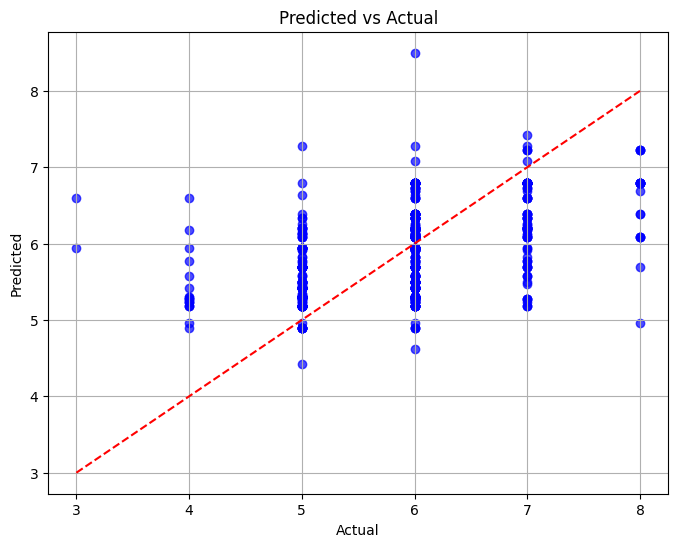

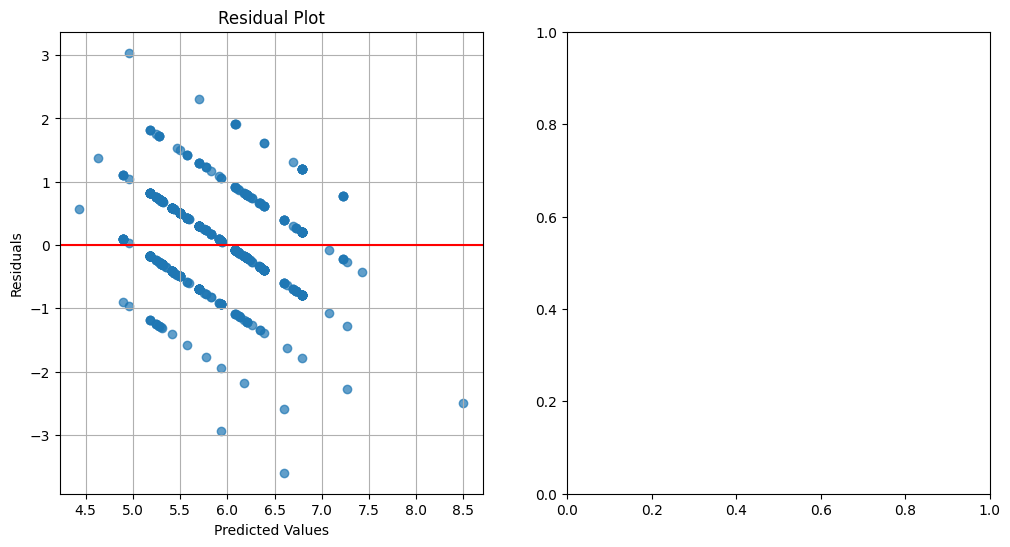

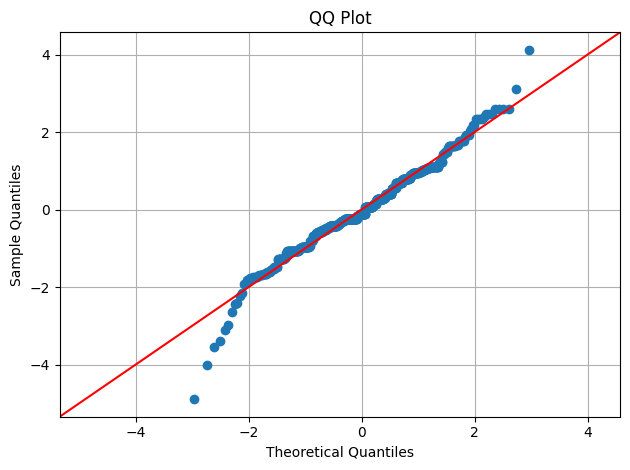

In [112]:
# Features and Target
X = dt_data.drop(columns=['quality'])
y = dt_data['quality']
# Split the data into training and testing sets (Unseen Data in the Cross validation)
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.1, random_state=456)

print("X_train samples:", len(X_train))
print("X_unseen samples:", len(X_unseen))
print("y_train samples:", len(y_train))
print("y_unseen samples:", len(y_unseen))

dt_pruned_model = DecisionTreeRegressor(random_state=456, ccp_alpha=0.0013135328170284823)

# Perform 10-fold cross-validation and get predictions
kf = KFold(n_splits=10, shuffle=True, random_state=456)
cv_scores = cross_val_score(dt_pruned_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores
rmse_scores = np.sqrt(cv_scores)

print(f'Cross-validated RMSE scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')

# Train the final model on the entire training set
dt_pruned_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_pruned_model.predict(X_unseen)

# Calculate the regression metrics on the test set
mse = mean_squared_error(y_unseen, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_unseen, y_pred)

print(f'Test Mean Squared Error: {mse}')
print(f'Test Root Mean Squared Error: {rmse}')
print(f'Test R-squared: {r2}')

# Visualize the predictions vs actual values
residuals = y_unseen - y_pred

# Plotting Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_unseen, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_unseen), max(y_unseen)], [min(y_unseen), max(y_unseen)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.grid(True)
plt.show()

# Residual Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)

# QQ Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line ='45', fit=True)
plt.title('QQ Plot')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Use Ensemble techniques to improve the performance

In [113]:
from sklearn.ensemble import BaggingRegressor

X_train samples: 5847
X_unseen samples: 650
y_train samples: 5847
y_unseen samples: 650
Cross-validated RMSE scores: [0.6019664  0.60528763 0.58521645 0.60017704 0.64300121 0.58227501
 0.60824847 0.63168473 0.5833646  0.60050806]
Mean RMSE: 0.6041729598433008
Standard Deviation of RMSE: 0.01894335759344756
Test Mean Squared Error: 0.35399657692307696
Test Root Mean Squared Error: 0.5949761145819864
Test R-squared: 0.50223299658201


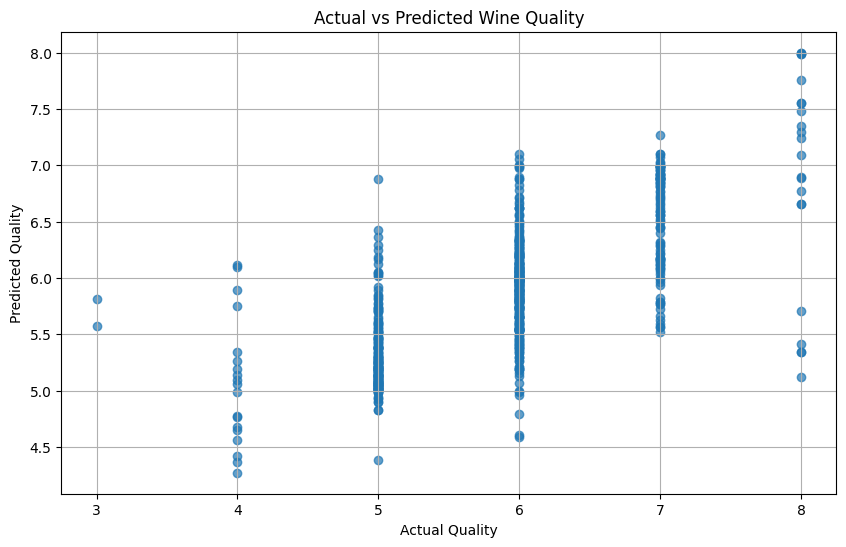

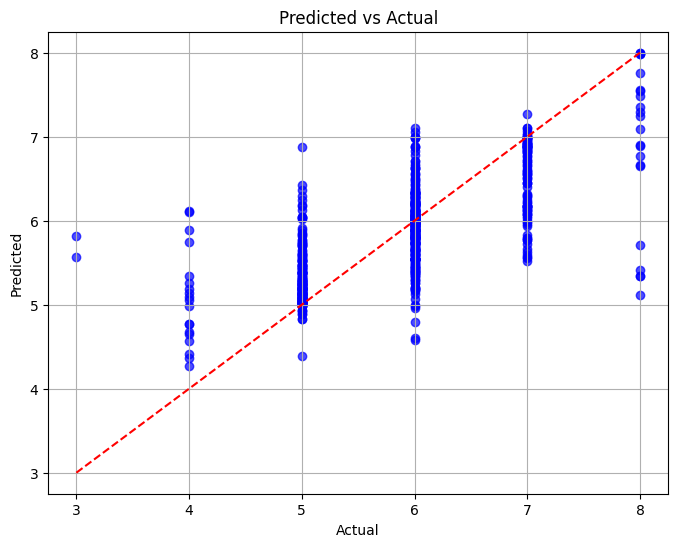

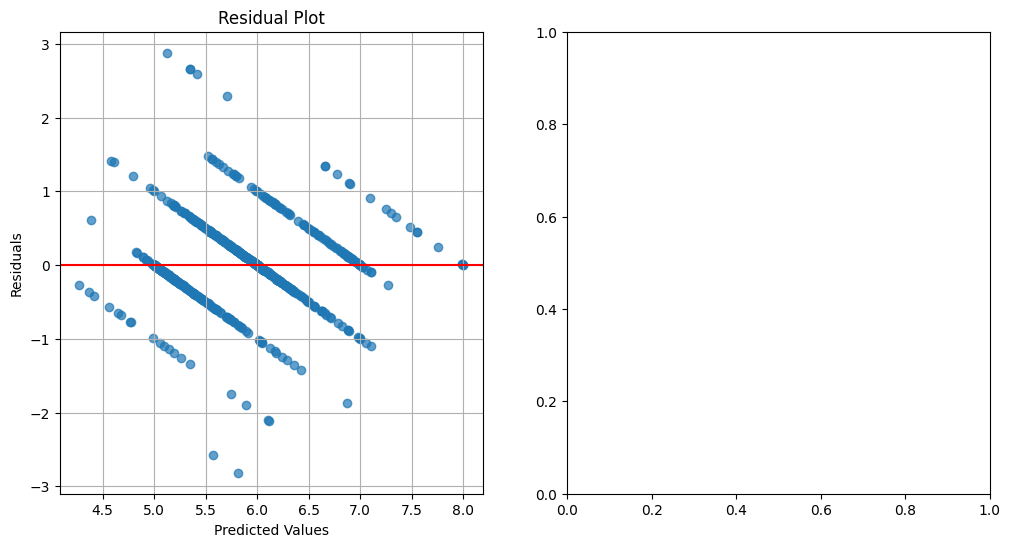

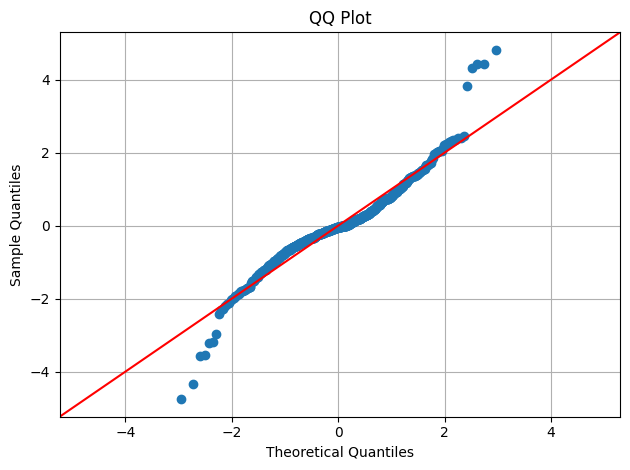

In [114]:
# Initialize the Bagging Regressor with Decision Trees

# Features and Target
X = dt_data.drop(columns=['quality'])
y = dt_data['quality']
# Split the data into training and testing sets (Unseen Data in the Cross validation)
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.1, random_state=456)

print("X_train samples:", len(X_train))
print("X_unseen samples:", len(X_unseen))
print("y_train samples:", len(y_train))
print("y_unseen samples:", len(y_unseen))

dt_bagging = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=456), n_estimators=200,  bootstrap=True)

# Perform 10-fold cross-validation on the training set
kf = KFold(n_splits=10, shuffle=True, random_state=456)
cv_scores = cross_val_score(dt_bagging, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores
rmse_scores = np.sqrt(cv_scores)

print(f'Cross-validated RMSE scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')

# Train the final model on the entire training set
dt_bagging.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_bagging.predict(X_unseen)

# Calculate the regression metrics on the test set
mse = mean_squared_error(y_unseen, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_unseen, y_pred)

print(f'Test Mean Squared Error: {mse}')
print(f'Test Root Mean Squared Error: {rmse}')
print(f'Test R-squared: {r2}')

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_unseen, y_pred, alpha=0.7)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.grid(True)
plt.show()

# Visualize the predictions vs actual values
residuals = y_unseen - y_pred

# Plotting Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_unseen, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_unseen), max(y_unseen)], [min(y_unseen), max(y_unseen)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.grid(True)
plt.show()

# Residual Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)

# QQ Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line ='45', fit=True)
plt.title('QQ Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

### Random Forest Regression Model 

Without K -Fold Cross Validation 

X_train samples: 5847
X_unseen samples: 650
y_train samples: 5847
y_unseen samples: 650
Training Mean Squared Error: 0.04762403010090644
Training Root Mean Squared Error: 0.2182293062375135
Training R-squared: 0.9379851034302136
Test Mean Squared Error: 0.35714373538461536
Test Root Mean Squared Error: 0.5976150394565178
Standard Deviation of RMSE: 0.0
Test R-squared: 0.49780766668108867


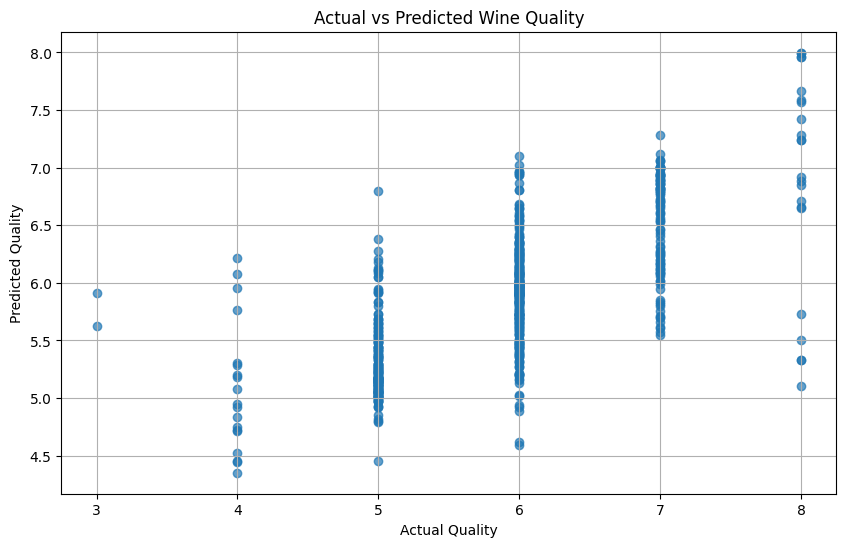

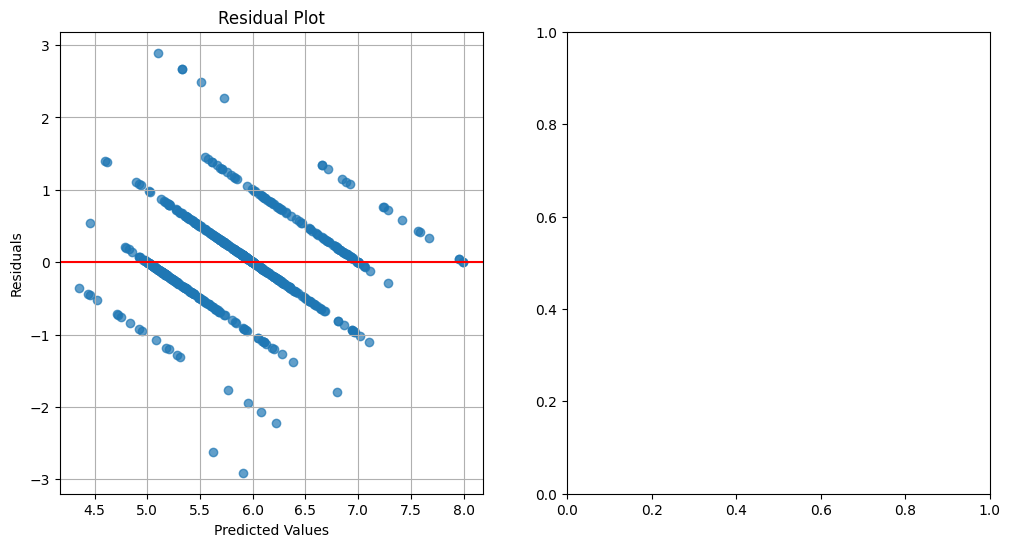

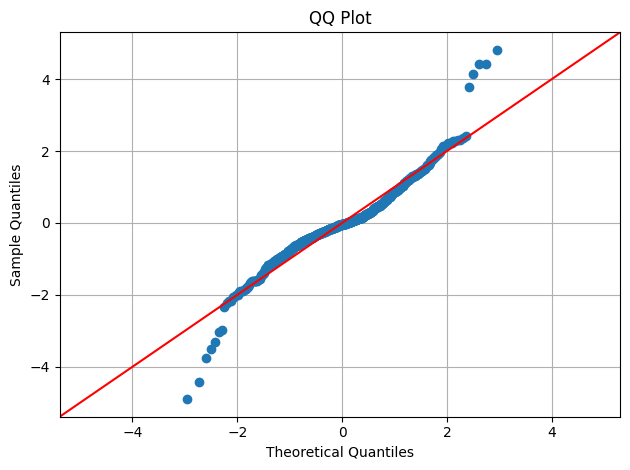

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Features and Target
X = dt_data.drop(columns=['quality'])
y = dt_data['quality']
# Split the data into training and testing sets (Unseen Data in the Cross validation)
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.1, random_state=456)

print("X_train samples:", len(X_train))
print("X_unseen samples:", len(X_unseen))
print("y_train samples:", len(y_train))
print("y_unseen samples:", len(y_unseen))

# Random Forest Regression
rf_sim_model = RandomForestRegressor(random_state=456, n_estimators=500)


# Fit the model on the training data
rf_sim_model.fit(X_train, y_train)

y_train_pred = rf_sim_model.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training Root Mean Squared Error: {train_rmse}')
print(f'Training R-squared: {train_r2}')

# Predict on the test set
y_pred = rf_sim_model.predict(X_unseen)

# Calculate the regression metrics on the test set
mse = mean_squared_error(y_unseen, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_unseen, y_pred)

print(f'Test Mean Squared Error: {mse}')
print(f'Test Root Mean Squared Error: {rmse}')
print(f'Standard Deviation of RMSE: {rmse.std()}')
print(f'Test R-squared: {r2}')

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_unseen, y_pred, alpha=0.7)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_unseen - y_pred
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)

# QQ Plot
import statsmodels.api as sm
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot')
plt.grid(True)

plt.tight_layout()
plt.show()


With K -Fold Cross Validation

X_train samples: 5847
X_unseen samples: 650
y_train samples: 5847
y_unseen samples: 650
Cross-validated RMSE scores: [0.60394653 0.6034679  0.58294382 0.59818431 0.63507277 0.58092968
 0.61008956 0.63195321 0.58664926 0.59489808]
Mean RMSE: 0.6028135113132561
Standard Deviation of RMSE: 0.017786252987574625
Test Mean Squared Error: 0.356179423076923
Test Root Mean Squared Error: 0.5968076935470278
Test R-squared: 0.49916362004066983


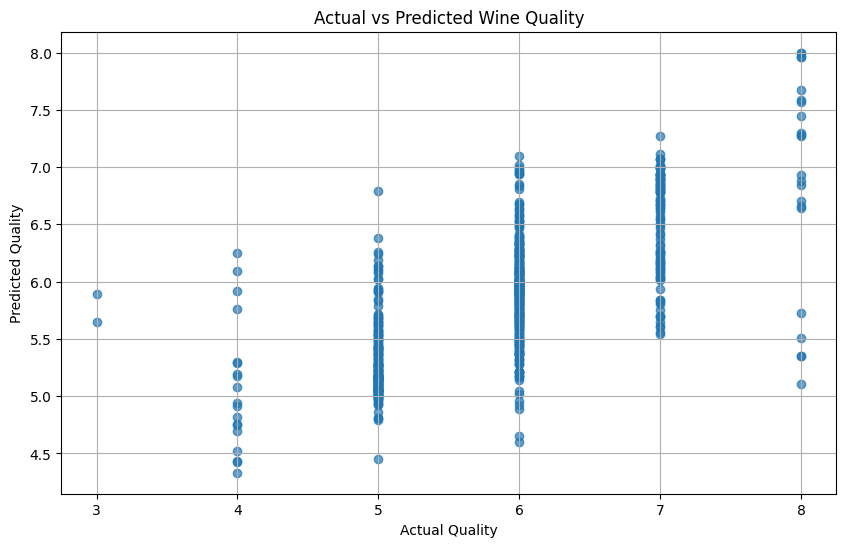

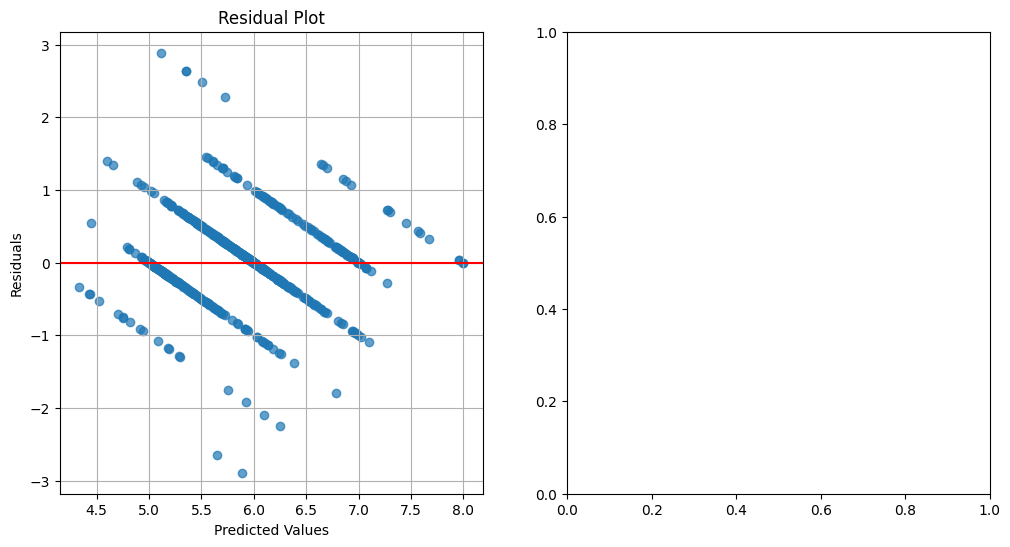

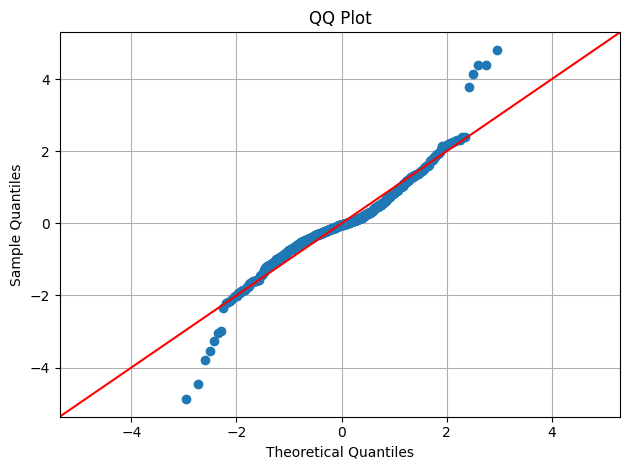

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Features and Target
X = dt_data.drop(columns=['quality'])
y = dt_data['quality']
# Split the data into training and testing sets (Unseen Data in the Cross validation)
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.1, random_state=456)

print("X_train samples:", len(X_train))
print("X_unseen samples:", len(X_unseen))
print("y_train samples:", len(y_train))
print("y_unseen samples:", len(y_unseen))

# Random Forest Regression
rf_model_fk = RandomForestRegressor(random_state=456, n_estimators=600)

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=456)
cv_scores = cross_val_score(rf_model_fk, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores
rmse_scores = np.sqrt(cv_scores)

print(f'Cross-validated RMSE scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')

# Fit the model on the entire training set
rf_model_fk.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model_fk.predict(X_unseen)

# Calculate the regression metrics on the test set
mse = mean_squared_error(y_unseen, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_unseen, y_pred)

print(f'Test Mean Squared Error: {mse}')
print(f'Test Root Mean Squared Error: {rmse}')
print(f'Test R-squared: {r2}')

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_unseen, y_pred, alpha=0.7)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_unseen - y_pred
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)

# QQ Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Use Ensemble techniques to improve the performance

X_train samples: 5847
X_unseen samples: 650
y_train samples: 5847
y_unseen samples: 650
Test Mean Squared Error: 0.3757219351790769
Test Root Mean Squared Error: 0.612961609873797
Test R-squared: 0.47168420831047464


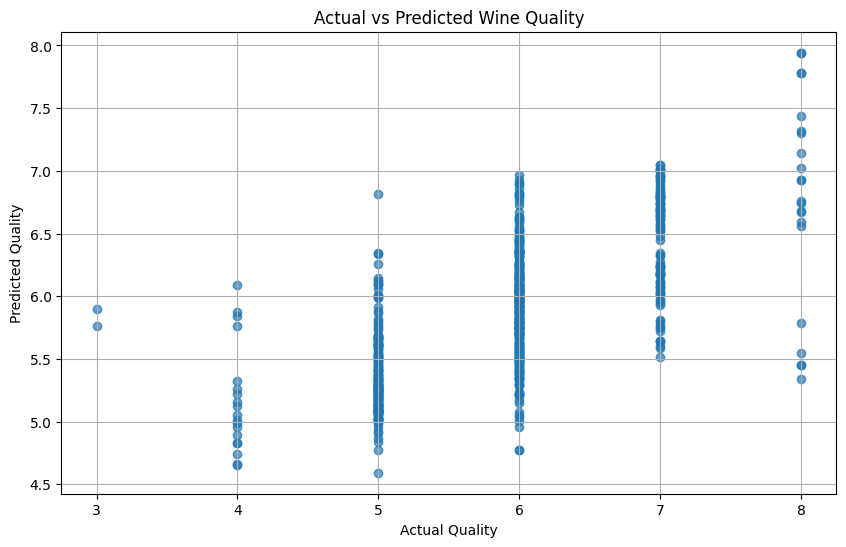

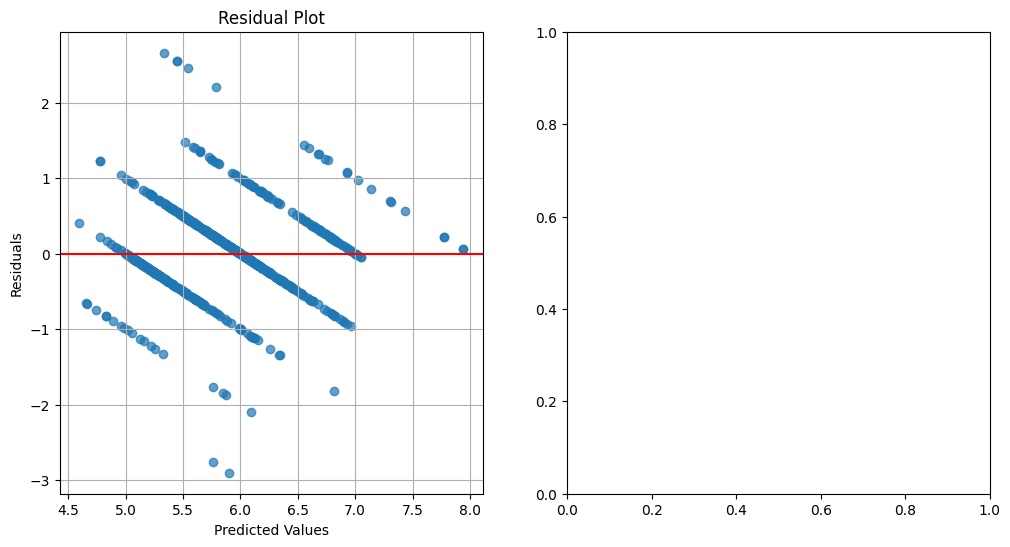

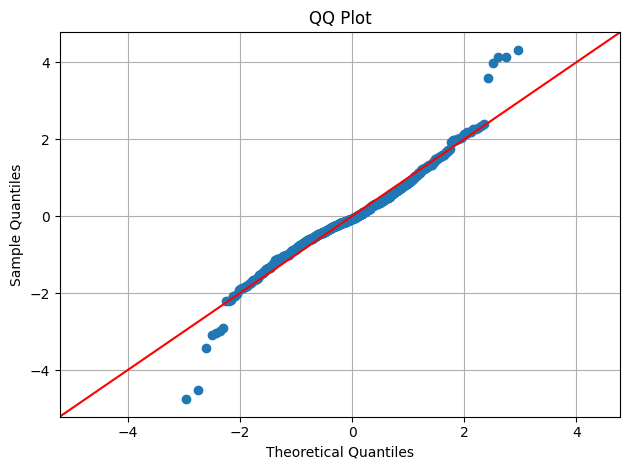

In [41]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Features and Target
X = dt_data.drop(columns=['quality'])
y = dt_data['quality']

# Split the data into training and testing sets (Unseen Data in the Cross validation)
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.1, random_state=456)

print("X_train samples:", len(X_train))
print("X_unseen samples:", len(X_unseen))
print("y_train samples:", len(y_train))
print("y_unseen samples:", len(y_unseen))

# Bagging Regression with RandomForestRegressor as base estimator


bagging_rf_model = BaggingRegressor(estimator=RandomForestRegressor(random_state=456),n_estimators=500,  bootstrap=True)

# Fit the model on the training set
bagging_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_rf_model.predict(X_unseen)

# Calculate the regression metrics on the test set
mse = mean_squared_error(y_unseen, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_unseen, y_pred)

print(f'Test Mean Squared Error: {mse}')
print(f'Test Root Mean Squared Error: {rmse}')
print(f'Test R-squared: {r2}')

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_unseen, y_pred, alpha=0.7)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_unseen - y_pred
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)

# QQ Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot')
plt.grid(True)

plt.tight_layout()
plt.show()


## Model Design wit SVM 

In [29]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

Without K Fold Cross Validation

X_train samples: 5847
X_unseen samples: 650
y_train samples: 5847
y_unseen samples: 650
Test Mean Squared Error: 0.4658042736879077
Test Root Mean Squared Error: 0.6824985521507776
Standard Deviation of RMSE: 0.0
Test R-squared: 0.345016272450266


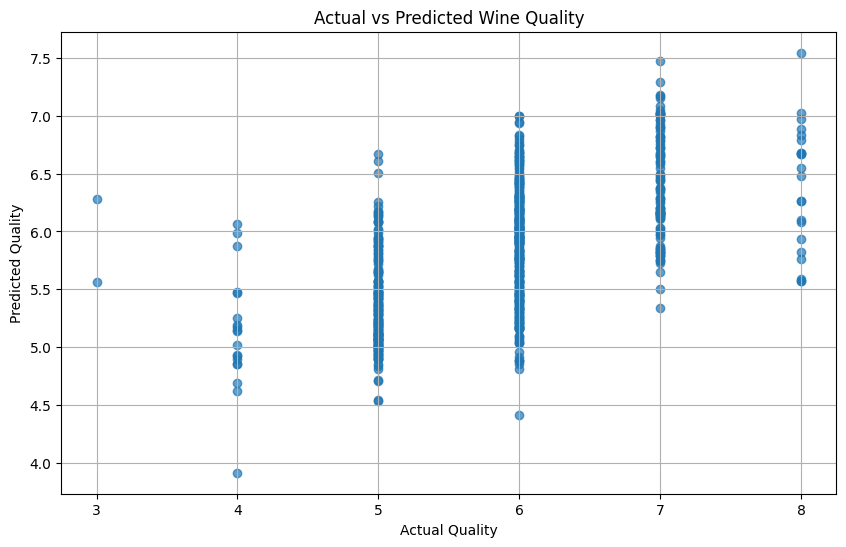

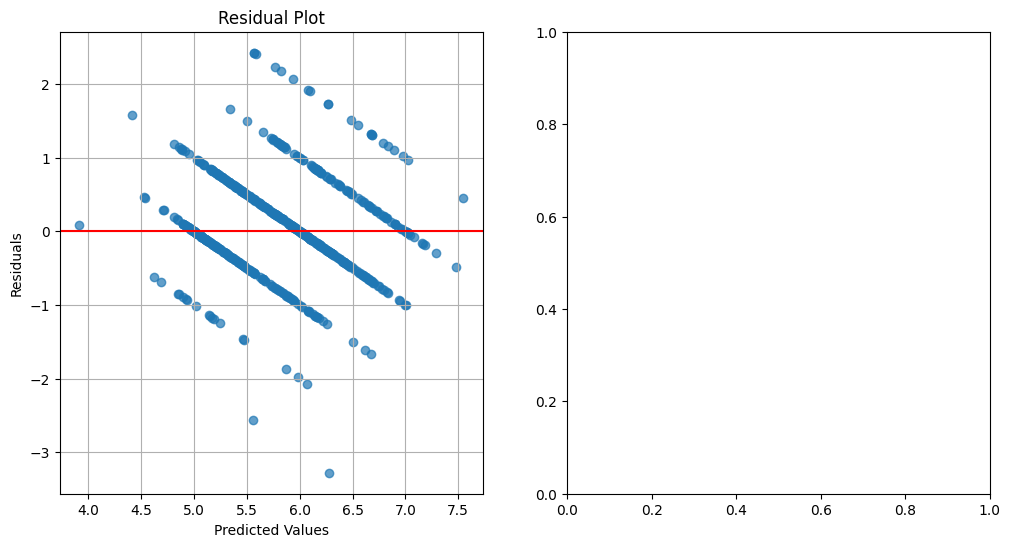

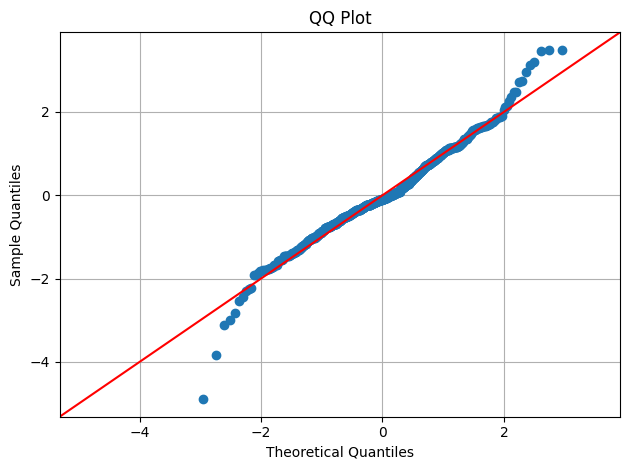

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Features and Target
X = dt_data.drop(columns=['quality'])
y = dt_data['quality']
# Split the data into training and testing sets (Unseen Data in the Cross validation)
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.1, random_state=456)

print("X_train samples:", len(X_train))
print("X_unseen samples:", len(X_unseen))
print("y_train samples:", len(y_train))
print("y_unseen samples:", len(y_unseen))

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_unseen_scaled = scaler.transform(X_unseen)

# Initialize the SVM Regressor
svm_sim_reg = SVR(kernel='rbf')

# Train the SVR model
svm_sim_reg.fit(X_train_scaled, y_train)

# Perform predictions on the test set
y_pred = svm_sim_reg.predict(X_test_unseen_scaled)

# Calculate the regression metrics on the test set
mse = mean_squared_error(y_unseen, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_unseen, y_pred)

print(f'Test Mean Squared Error: {mse}')
print(f'Test Root Mean Squared Error: {rmse}')
print(f'Standard Deviation of RMSE: {rmse.std()}')
print(f'Test R-squared: {r2}')

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_unseen, y_pred, alpha=0.7)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_unseen - y_pred
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)

# QQ Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot')
plt.grid(True)

plt.tight_layout()
plt.show()


With K -Fold cross validation 

X_train samples: 5847
X_unseen samples: 650
y_train samples: 5847
y_unseen samples: 650
Cross-validated RMSE scores: [0.7228925  0.74333883 0.72351629 0.75096158 0.76550638 0.6808586
 0.76639692 0.77101058 0.71744583 0.71114246]
Mean RMSE: 0.7353069961729686
Standard Deviation of RMSE: 0.027610908592638584
Test Mean Squared Error: 0.5507526110254988
Test Root Mean Squared Error: 0.7421270854951318
Test R-squared: 0.22556743571458882


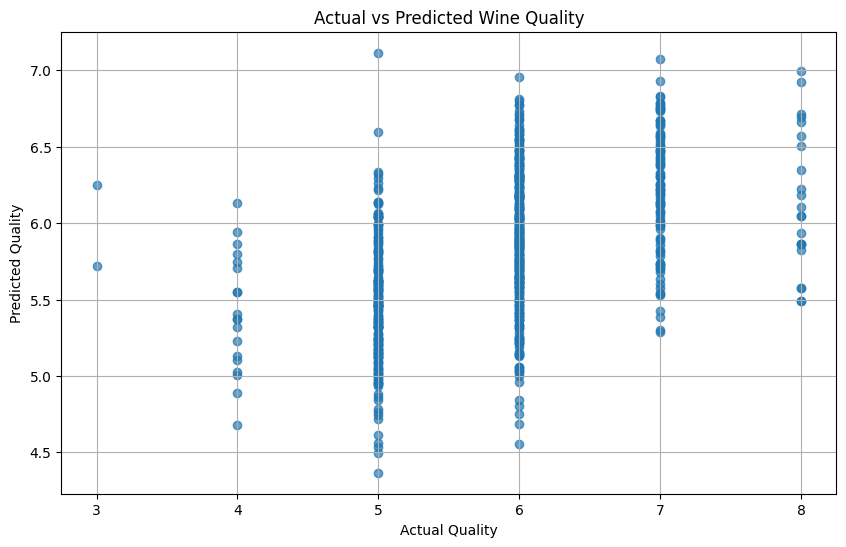

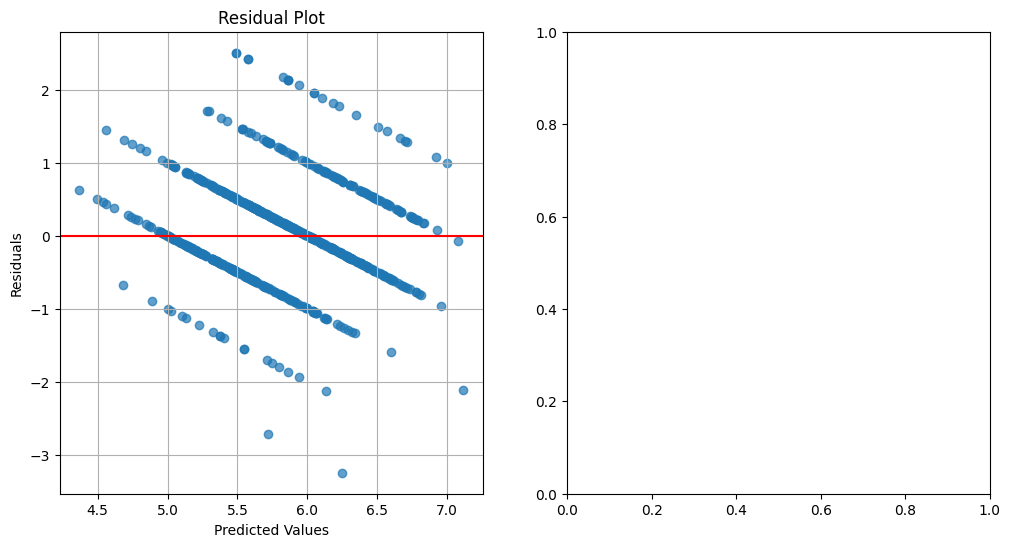

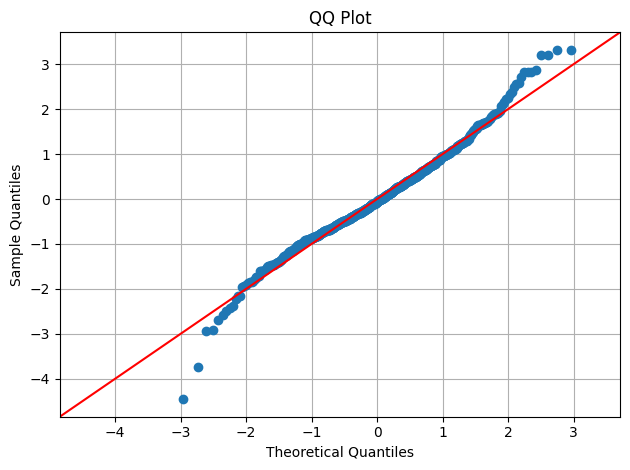

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Features and Target
X = dt_data.drop(columns=['quality'])
y = dt_data['quality']
# Split the data into training and testing sets (Unseen Data in the Cross validation)
X_train, X_unseen, y_train, y_unseen = train_test_split(X, y, test_size=0.1, random_state=456)

print("X_train samples:", len(X_train))
print("X_unseen samples:", len(X_unseen))
print("y_train samples:", len(y_train))
print("y_unseen samples:", len(y_unseen))


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_unseen_scaled = scaler.transform(X_unseen)

# Initialize the SVM Regressor
svm_kf_reg = SVR(kernel='linear',C=1, gamma=20)

# Perform 10-fold cross-validation on the training set
kf = KFold(n_splits=10, shuffle=True, random_state=456)
cv_scores = cross_val_score(svm_kf_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = -cv_scores
rmse_scores = np.sqrt(cv_scores)

print(f'Cross-validated RMSE scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')

# Train the SVR model
svm_kf_reg.fit(X_train_scaled, y_train)

y_pred = svm_kf_reg.predict(X_test_unseen_scaled)

# Calculate the regression metrics on the test set
mse = mean_squared_error(y_unseen, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_unseen, y_pred)

print(f'Test Mean Squared Error: {mse}')
print(f'Test Root Mean Squared Error: {rmse}')
print(f'Test R-squared: {r2}')



# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_unseen, y_pred, alpha=0.7)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_unseen - y_pred
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)

# QQ Plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot')
plt.grid(True)

plt.tight_layout()
plt.show()


SVM parameter optimizing 

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'sigmoid']
}
kf = KFold(n_splits=10, shuffle=True, random_state=456)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(svm_kf_reg, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print("Best parameters:", best_params)
print("Best RMSE:", best_score)


## K -Mean Clustering 

C:\Users\Kanchana\AppData\Local\Temp\ipykernel_18496\2661278638.py:16: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



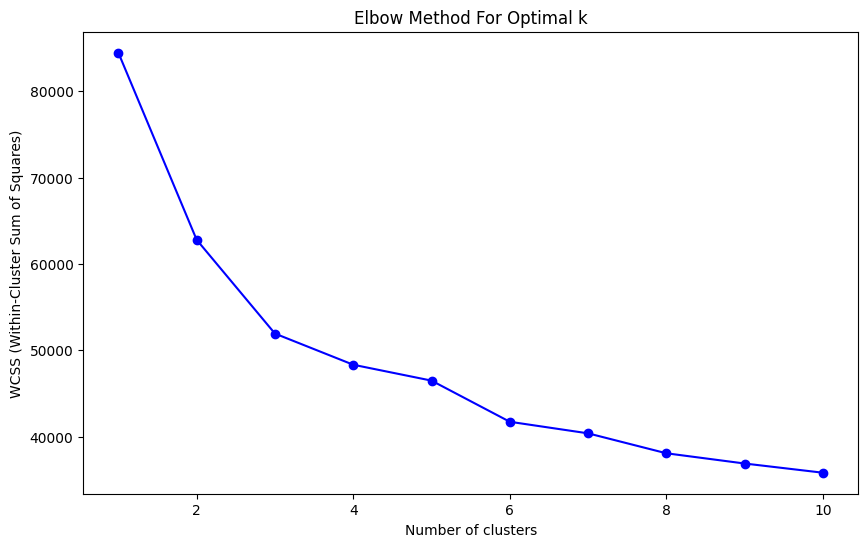

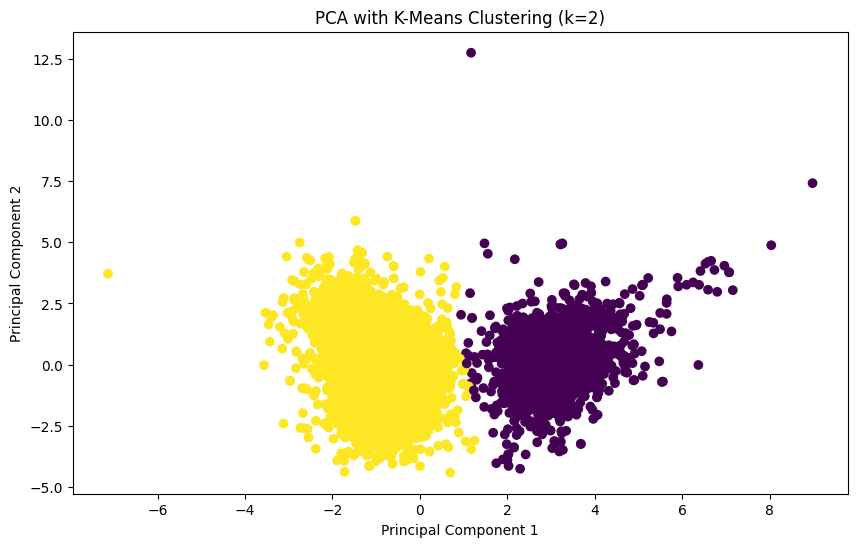

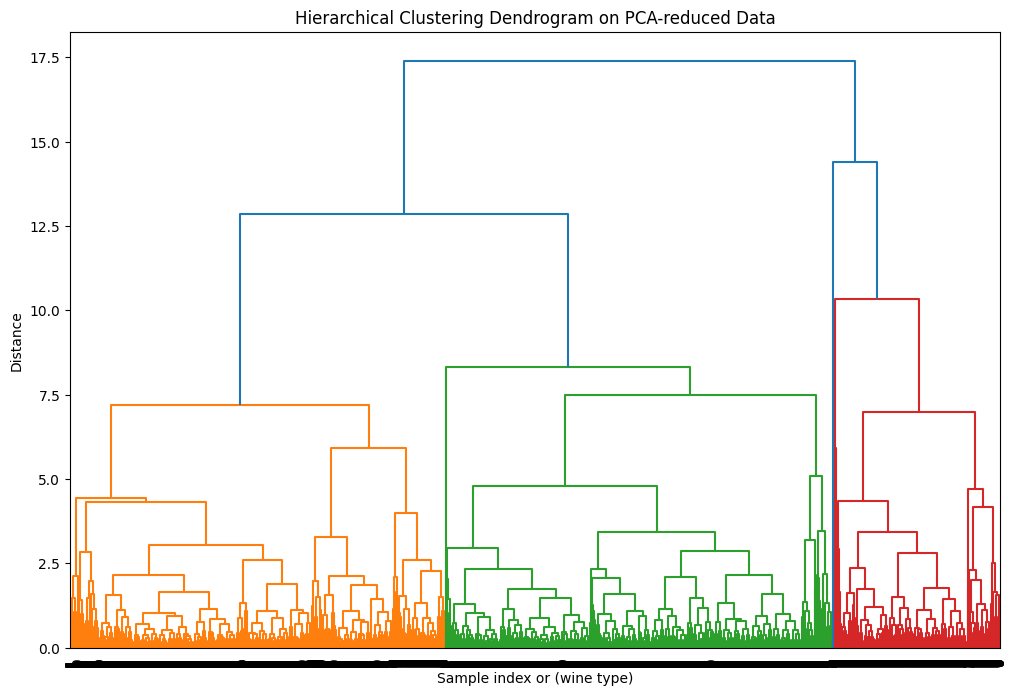

In [95]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Concatenate the two datasets
red_wine_data = pd.read_csv("winequality-red.csv", sep=';')
white_wine_data = pd.read_csv("winequality-white.csv", sep=';')
# Assign labels to the observations
red_wine_data['wine_type'] = 'red'
white_wine_data['wine_type'] = 'white'
data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

data['wine_type'] = data['wine_type'].replace({'red': 0, 'white': 1})

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Elbow Method to find the optimal number of clusters
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Perform PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Apply K-Means clustering with the optimal number of clusters
optimal_k = 2 # Replace with the optimal k found from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_pca)
kmeans_labels = kmeans.labels_
data['Cluster'] = kmeans_labels

# Plot PCA results with K-Means clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title(f'PCA with K-Means Clustering (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Perform Hierarchical Clustering on PCA-reduced data
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

correlation_distance = pdist(data_pca, metric='correlation')

# Perform Hierarchical Clustering with average linkage
mergings = linkage(correlation_distance, method='average')

# Plot Hierarchical Clustering Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(mergings)
plt.title('Hierarchical Clustering Dendrogram with Correlation Distance and Average Linkage')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [122]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Concatenate the two datasets
red_wine_data = pd.read_csv("winequality-red.csv", sep=';')
white_wine_data = pd.read_csv("winequality-white.csv", sep=';')

# Assign labels to the observations
red_wine_data['wine_type'] = 'red'
white_wine_data['wine_type'] = 'white'
data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

# Convert wine type labels to numeric
data['wine_type'] = data['wine_type'].replace({'red': 0, 'white': 1})

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

optimal_k = 2  # Based on the plots
kmeans = KMeans(n_clusters=optimal_k, random_state=456)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_labels = kmeans.labels_
data['KCluster'] = kmeans_labels



C:\Users\Kanchana\AppData\Local\Temp\ipykernel_18496\2806058605.py:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Visualize the features by cluster 

<Figure size 1000x600 with 0 Axes>

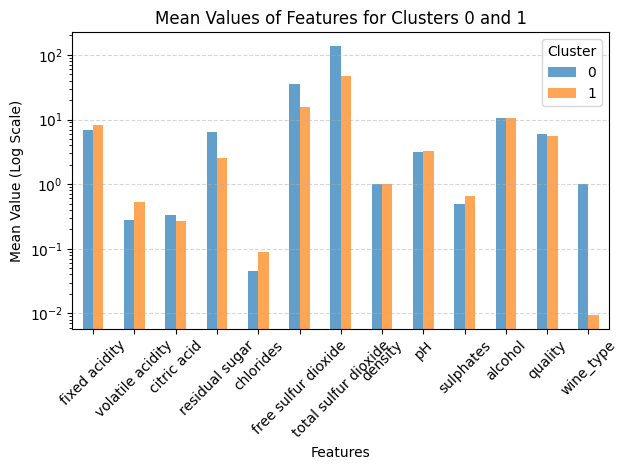

9

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group the data by KMeans cluster labels
cluster_data = data[data['KCluster'].isin([0, 1])]  # Include both clusters 0 and 1

selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality','wine_type']

# Select the data corresponding to the selected features
selected_data = cluster_data[selected_features]

# Calculate the mean values for each feature for each cluster
mean_values = cluster_data.groupby('KCluster')[selected_features].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = mean_values.T.plot(kind='bar', alpha=0.7)  # Transpose the DataFrame for better visualization

# Set y-axis scale to logarithmic
ax.set_yscale('log')

plt.title('Mean Values of Features for Clusters 0 and 1')
plt.xlabel('Features')
plt.ylabel('Mean Value (Log Scale)')  # Update y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()
9

In [119]:
cluster_1_data = data[data['KCluster'] == 1]

# Get the summary counts for Wine_type = 0 and Wine_type = 1
wine_type_0_count = cluster_1_data[cluster_1_data['wine_type'] == 0].shape[0]
wine_type_1_count = cluster_1_data[cluster_1_data['wine_type'] == 1].shape[0]

# Create a summary DataFrame
summary_counts = pd.DataFrame({
    'Wine Type': ['Red (0)', 'White (1)'],
    'Count': [wine_type_0_count, wine_type_1_count]
})

# Print the summary
print(summary_counts)

   Wine Type  Count
0    Red (0)   1586
1  White (1)     15


hierarchical clustering  

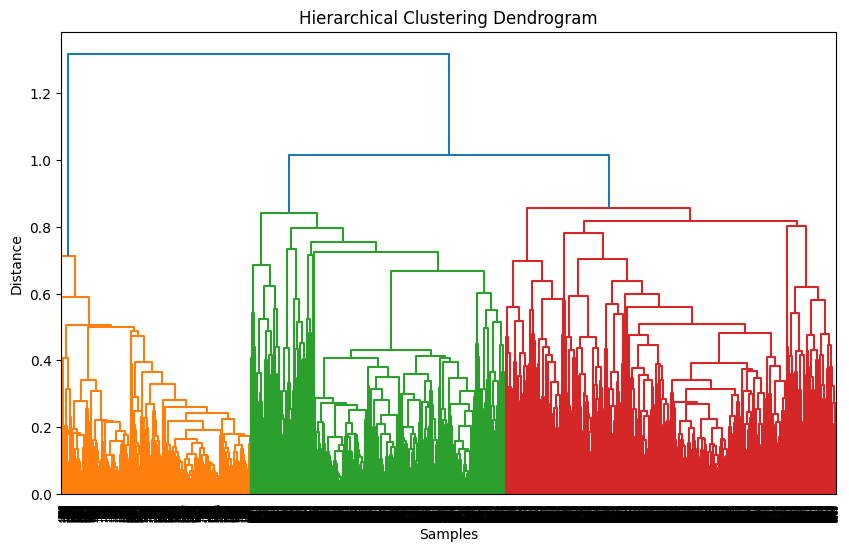

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type  KCluster  HCluster  
0      9.4        5          0   

In [123]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Compute the correlation distance matrix
correlation_distance_matrix = pdist(X_scaled, metric='correlation')

# Perform hierarchical clustering with complete linkage
distance_matrix = linkage(correlation_distance_matrix, method='average')

# Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(distance_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Determine the optimal number of clusters (e.g., visually or using a metric)
optimal_num_clusters = 2  # Change as needed

# Cut the dendrogram to get clusters
clusters = fcluster(distance_matrix, t=optimal_num_clusters, criterion='maxclust')

# Assign cluster labels to the original data
data['HCluster'] = clusters

# Print the first few rows of the data with cluster labels
print(data.head())


In [125]:
from sklearn.metrics import adjusted_rand_score

# Assuming data['KCluster'] and data['HCluster'] contain the cluster labels
kmeans_labels = data['KCluster']
hierarchical_labels = data['HCluster']

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(kmeans_labels, hierarchical_labels)
print("Adjusted Rand Index between K-Means and Hierarchical clustering:", ari)


Adjusted Rand Index between K-Means and Hierarchical clustering: 0.9927526140274235


Adjusted Rand Index between K-Means and Hierarchical clustering: 0.9927526140274235
Jaccard Similarity between K-Means and Hierarchical clustering: [0.         0.99312929 0.        ]
Fowlkes-Mallows Index between K-Means and Hierarchical clustering: 0.997315107651502
Similarity Matrix:
[0.0, 0.9977583044630121]
[0.9931292941911305, 0.0016930891180544866]


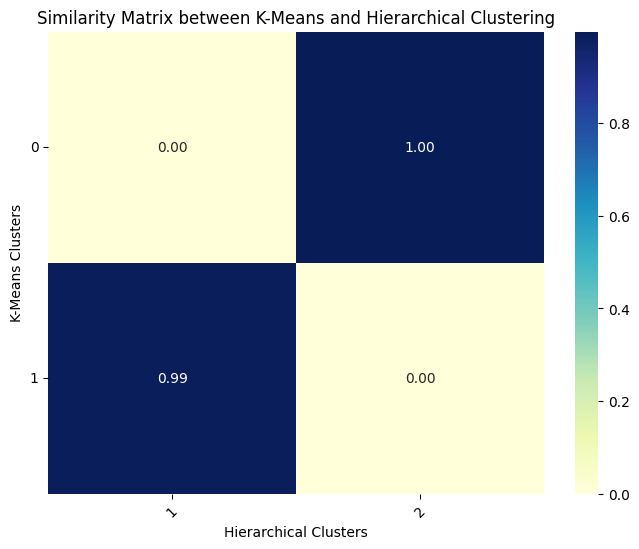

In [134]:
from sklearn.metrics import adjusted_rand_score, jaccard_score, fowlkes_mallows_score
from itertools import product

# Assuming data['KCluster'] and data['HCluster'] contain the cluster labels
kmeans_labels = data['KCluster']
hierarchical_labels = data['HCluster']

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(kmeans_labels, hierarchical_labels)
print("Adjusted Rand Index between K-Means and Hierarchical clustering:", ari)

# Calculate Jaccard Similarity
jaccard_similarity = jaccard_score(kmeans_labels, hierarchical_labels, average=None)
print("Jaccard Similarity between K-Means and Hierarchical clustering:", jaccard_similarity)

# Calculate Fowlkes-Mallows Index
fm_index = fowlkes_mallows_score(kmeans_labels, hierarchical_labels)
print("Fowlkes-Mallows Index between K-Means and Hierarchical clustering:", fm_index)

# Creating a similarity matrix
similarity_matrix = []
for k_label in set(kmeans_labels):
    row = []
    for h_label in set(hierarchical_labels):
        k_indices = [i for i, label in enumerate(kmeans_labels) if label == k_label]
        h_indices = [i for i, label in enumerate(hierarchical_labels) if label == h_label]
        intersection = len(set(k_indices).intersection(h_indices))
        union = len(set(k_indices).union(h_indices))
        similarity = intersection / union
        row.append(similarity)
    similarity_matrix.append(row)

print("Similarity Matrix:")
for row in similarity_matrix:
    print(row)

similarity_array = np.array(similarity_matrix)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_array, cmap='YlGnBu', annot=True, fmt=".2f", xticklabels=set(hierarchical_labels), yticklabels=set(kmeans_labels))
plt.title("Similarity Matrix between K-Means and Hierarchical Clustering")
plt.xlabel("Hierarchical Clusters")
plt.ylabel("K-Means Clusters")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



### Droping the wine type and conduct the custering

C:\Users\Kanchana\AppData\Local\Temp\ipykernel_18496\967133336.py:16: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



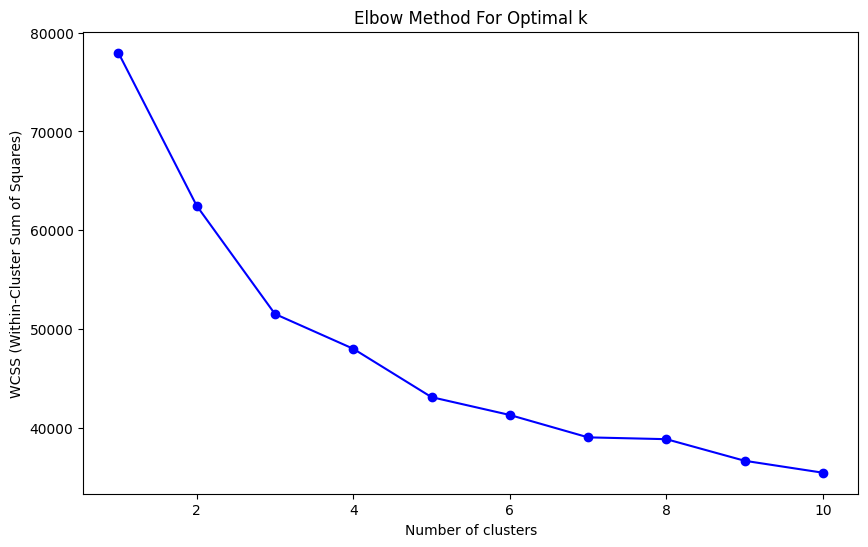

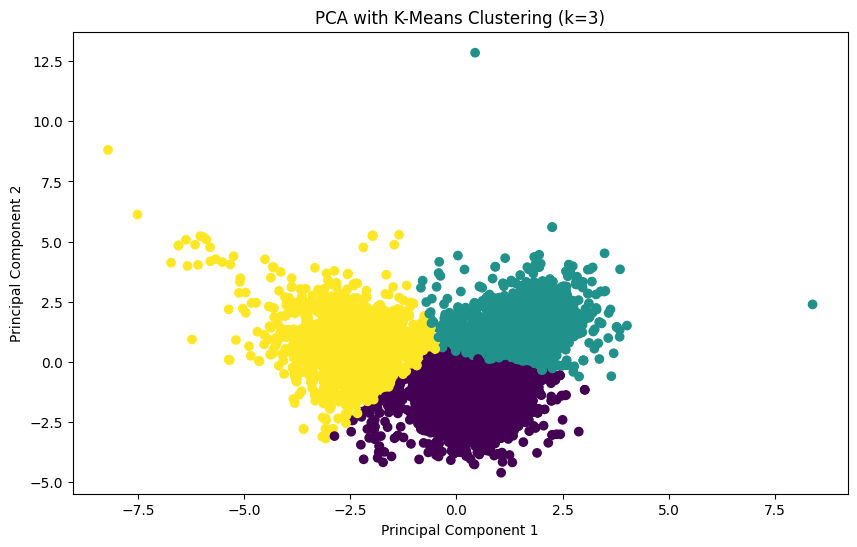

In [85]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Concatenate the two datasets
red_wine_data = pd.read_csv("winequality-red.csv", sep=';')
white_wine_data = pd.read_csv("winequality-white.csv", sep=';')
# Assign labels to the observations
red_wine_data['wine_type'] = 'red'
white_wine_data['wine_type'] = 'white'
data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

data['wine_type'] = data['wine_type'].replace({'red': 0, 'white': 1})
# Concatenate the two datasets
data = dt_data.drop(columns=['wine_type'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Elbow Method to find the optimal number of clusters
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.show()

# Perform PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Apply K-Means clustering with the optimal number of clusters
optimal_k = 3# Replace with the optimal k found from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_pca)
kmeans_labels = kmeans.labels_
data['Cluster'] = kmeans_labels

# Plot PCA results with K-Means clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title(f'PCA with K-Means Clustering (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Perform Hierarchical Clustering on PCA-reduced data
# from scipy.cluster.hierarchy import linkage, dendrogram
# from scipy.spatial.distance import pdist

# distance_matrix_correlation = pdist(data_pca, metric='correlation')
# mergings = linkage(distance_matrix_correlation, method='complete')


# mergings = linkage(data_pca, method='complete')
# plt.figure(figsize=(12, 8))
# dendrogram(mergings, labels=data['wine_type'].values, leaf_rotation=90, leaf_font_size=10)
# plt.title('Hierarchical Clustering Dendrogram on PCA-reduced Data')
# plt.xlabel('Sample index or (wine type)')
# plt.ylabel('Distance')
# plt.show()



Visualize the features by cluster 

<Figure size 1000x600 with 0 Axes>

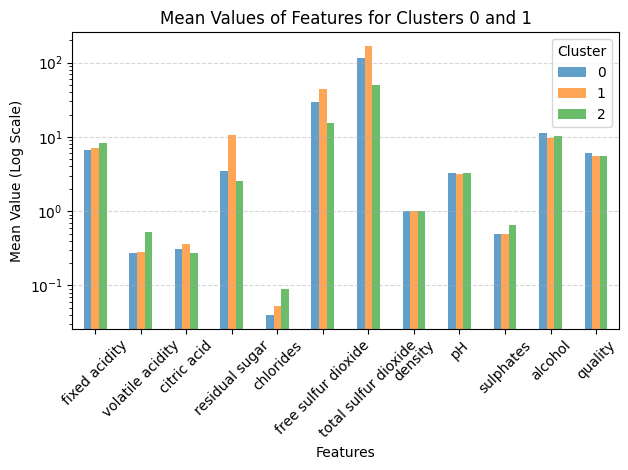

9

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group the data by KMeans cluster labels
cluster_data = data[data['Cluster'].isin([0, 1,2])]  # Include both clusters 0 and 1

selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

# Select the data corresponding to the selected features
selected_data = cluster_data[selected_features]

# Calculate the mean values for each feature for each cluster
mean_values = cluster_data.groupby('Cluster')[selected_features].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = mean_values.T.plot(kind='bar', alpha=0.7)  # Transpose the DataFrame for better visualization

# Set y-axis scale to logarithmic
ax.set_yscale('log')

plt.title('Mean Values of Features for Clusters 0 and 1')
plt.xlabel('Features')
plt.ylabel('Mean Value (Log Scale)')  # Update y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()
9

In [91]:
import pandas as pd

# Assume `data` is your DataFrame

# Create an empty list to store the summary data
summary_list = []

# Iterate over each feature (excluding 'Cluster')
for feature in data.columns:
    if feature != 'Cluster':
        # Group by 'Cluster' and count the values for the feature
        feature_counts = data.groupby('Cluster')[feature].count()
        
        # Append the counts to the summary list
        for cluster_no, count in feature_counts.items():
            summary_list.append([feature, cluster_no, count])

# Convert the summary list to a DataFrame
summary_df = pd.DataFrame(summary_list, columns=['Feature', 'Cluster No', 'Count'])

# Print the summary DataFrame
print(summary_df)


                 Feature  Cluster No  Count
0          fixed acidity           0   2869
1          fixed acidity           1   1996
2          fixed acidity           2   1632
3       volatile acidity           0   2869
4       volatile acidity           1   1996
5       volatile acidity           2   1632
6            citric acid           0   2869
7            citric acid           1   1996
8            citric acid           2   1632
9         residual sugar           0   2869
10        residual sugar           1   1996
11        residual sugar           2   1632
12             chlorides           0   2869
13             chlorides           1   1996
14             chlorides           2   1632
15   free sulfur dioxide           0   2869
16   free sulfur dioxide           1   1996
17   free sulfur dioxide           2   1632
18  total sulfur dioxide           0   2869
19  total sulfur dioxide           1   1996
20  total sulfur dioxide           2   1632
21               density        